In [1]:
#F1 : Shifted Sphere_F1_Dim50

In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time

In [3]:
#set desktop or system path
import sys
sys.path.append('C:\\DCHAVAN\\DSTI-Masters\\Curriculum\\2020\\Metaheuristics\\Assignment\\Project\\DataF1F6')

In [4]:
dataf1 = pd.read_csv("f1.csv")
ssf_data = dataf1["f1data"].tolist()
dataf1.head(10)

,f1data
0,-99.303451
1,-98.959765
2,-97.122955
3,-93.975881
4,-86.422208
5,-86.141248
6,-83.810496
7,-83.121793
8,-78.056147
9,-74.721445


In [5]:
# Function parameters
D = 50
bias = -450
lower_bound = -100
upper_bound = 100

In [6]:
# Shifted Sphere function with the parameters
def function(x, data=ssf_data, dim=D, f_bias=bias):
    F = 0
    for i in range(dim - 1):
        z = x[i] - data[i]
        F += z*z
    fc = F + f_bias
    return fc

In [7]:
#Function to compute the random uniform distribution
def fc_sol(dim, lower_bound, upper_bound):
    xmin = lower_bound * np.ones(dim)
    xmax = upper_bound * np.ones(dim)
    x0 = np.random.uniform(min(xmin), max(xmax), dim)
    return x0

In [8]:
list_sol = []
def all_sol(xk):
    fc_sol = function(xk)
    list_sol.append(fc_sol)
    return fc_sol

In [9]:
# F1-Function to solve the equation
def solver(dimension, lower_bound, upper_bound):
    global f1sol
    # Compute the initial guess
    x0 = fc_sol(dimension, lower_bound, upper_bound)
    # Minimize the function from BFGS algorithm
    f1sol = minimize(all_sol, x0, bounds=(lower_bound, upper_bound), method='BFGS', callback=all_sol)
    return f1sol, list_sol

In [10]:
def plot_fitness(solution):
    fig = plt.figure(figsize=(16, 13))
    plt.plot(solution)

In [11]:
plt.show()

In [12]:
# Solve the problem
solver(D, lower_bound, upper_bound)

C:\Users\Dilip\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


(      fun: -449.9999999998299
  hess_inv: array([[ 9.86479040e-01, -3.14700250e-03, -8.38613983e-04, ...,
          8.30424963e-03, -9.89661081e-03,  0.00000000e+00],
        [-3.14700250e-03,  9.96563557e-01, -2.88476951e-03, ...,
         -2.87048837e-03, -4.46134399e-04,  0.00000000e+00],
        [-8.38613983e-04, -2.88476951e-03,  9.97272725e-01, ...,
         -4.26267083e-03,  1.23359246e-03,  0.00000000e+00],
        ...,
        [ 8.30424963e-03, -2.87048837e-03, -4.26267083e-03, ...,
          9.86367226e-01,  9.37753925e-03,  0.00000000e+00],
        [-9.89661081e-03, -4.46134399e-04,  1.23359246e-03, ...,
          9.37753925e-03,  9.91480479e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])
       jac: array([-3.81469727e-06,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.81469727e-06,  0.00000000e+00,  0.00000000e+00,
        -3.81469727e-06, 

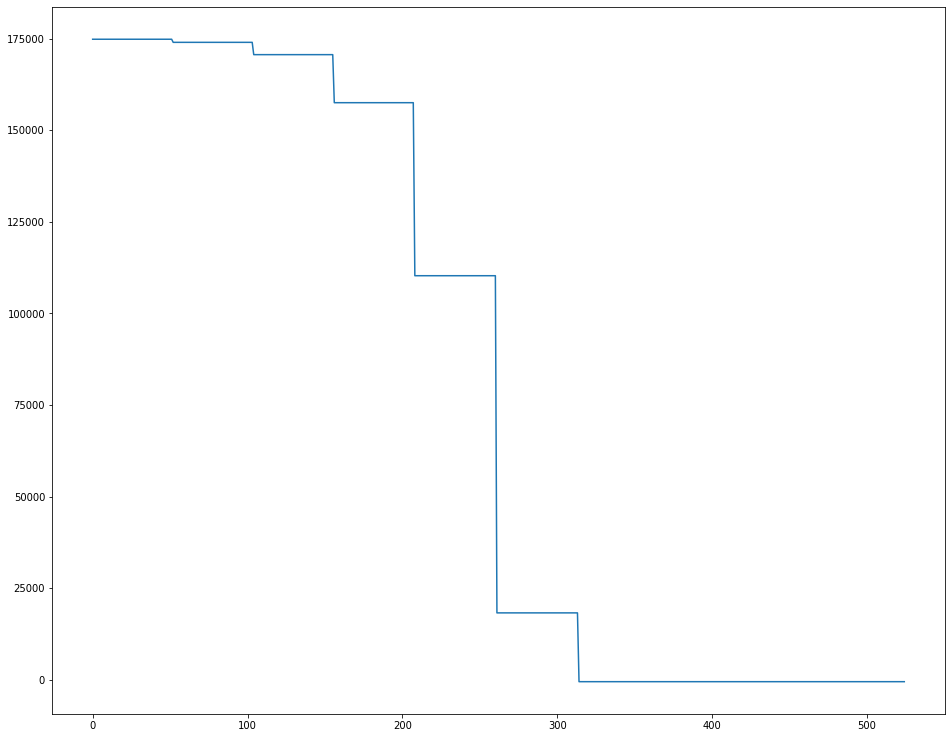

In [13]:
plot_fitness(list_sol)

In [14]:
f1_sol = pd.DataFrame(f1sol.x, columns=[''])
f1_sol.to_csv("f1_sphere50.csv", sep=",")